In [1]:
from platform import python_version
print('Versão do Python usada é:', python_version())

Versão do Python usada é: 3.9.12


In [3]:
# Importações

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
#Definindo os parâmetros para os gráficos de todo o notebook
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

### Carregando o dataset

In [7]:
df = pd.read_csv('dataset.csv')
df.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [8]:
df.shape

(11000, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       11000 non-null  int64 
 1   corredor_armazem         11000 non-null  object
 2   modo_envio               11000 non-null  object
 3   numero_chamadas_cliente  11000 non-null  int64 
 4   avaliacao_cliente        11000 non-null  int64 
 5   custo_produto            11000 non-null  int64 
 6   compras_anteriores       11000 non-null  int64 
 7   prioridade_produto       11000 non-null  object
 8   genero                   11000 non-null  object
 9   desconto                 11000 non-null  int64 
 10  peso_gramas              11000 non-null  int64 
 11  entregue_no_prazo        11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [10]:
df.describe()

,ID,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas,entregue_no_prazo
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,5500.500000,4.054455,2.990455,210.200909,3.567727,13.372545,3633.844455,0.596636
std,3175.570815,1.141438,1.413570,48.062985,1.522852,16.204943,1635.402722,0.490595
min,1.000000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.750000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.000000,0.000000
50%,5500.500000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8250.250000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,11000.000000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [11]:
df.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
10840,10841,C,Navio,3,1,139,2,media,M,2,4534,0
5941,5942,F,Navio,4,2,244,3,alta,M,1,5559,1
4162,4163,C,Navio,5,5,265,3,baixa,M,6,4423,1
8546,8547,A,Navio,2,5,212,2,alta,F,3,4389,0
2038,2039,C,Caminhao,3,2,254,2,baixa,M,37,2469,1


In [12]:
df.tail()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
10995,10996,B,Navio,4,1,232,5,media,F,6,1247,0
10996,10997,C,Navio,5,4,242,5,baixa,F,4,1155,0
10997,10998,F,Navio,5,2,223,6,media,M,2,1210,0
10998,10999,D,Navio,2,5,155,5,baixa,F,6,1639,0
10999,11000,C,Navio,4,2,255,5,baixa,F,6,1739,0


### Separando as variáveis categóricas e numéricas

In [13]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [14]:
df.dtypes

ID                          int64
corredor_armazem           object
modo_envio                 object
numero_chamadas_cliente     int64
avaliacao_cliente           int64
custo_produto               int64
compras_anteriores          int64
prioridade_produto         object
genero                     object
desconto                    int64
peso_gramas                 int64
entregue_no_prazo           int64
dtype: object

In [15]:
#Lista de colunas categóricas
cats = ['corredor_armazem',
        'modo_envio', 
        'prioridade_produto', 
        'genero']

In [16]:
#Lista de colunas numéricas

nums = ['numero_chamadas_cliente', 
        'avaliacao_cliente', 
        'custo_produto', 
        'compras_anteriores', 
        'desconto', 
        'peso_gramas']

In [17]:
# Variável target
df['entregue_no_prazo'].value_counts()

1    6563
0    4437
Name: entregue_no_prazo, dtype: int64

In [19]:
target = ['entregue_no_prazo']
target

['entregue_no_prazo']

### Explorando as variáveis numéricas

In [22]:
df[nums].describe()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4.054455,2.990455,210.200909,3.567727,13.372545,3633.844455
std,1.141438,1.413570,48.062985,1.522852,16.204943,1635.402722
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


In [23]:
# A colunas numero_chamadas_cliente, avaliacao_cliente e custo_produto tem Média e mediana estão com valores próximos. Indício que temos uma distribuição normal.

# As colunas compras_anteriores e desconto parecem estar inclinadas para a direita
#(média > mediana)

#A coluna peso_gramas parece estar mais inclinada para esquerda 
#(média < mediana)


<AxesSubplot:>

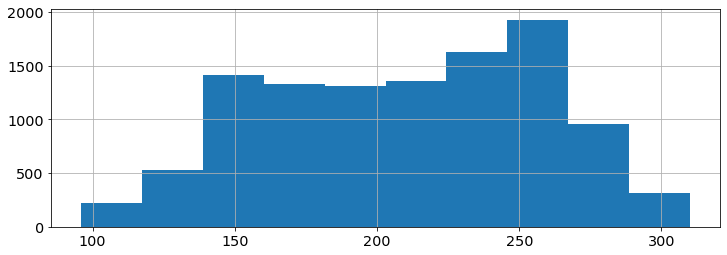

In [24]:
# Histograma 1

df['custo_produto'].hist()

<AxesSubplot:>

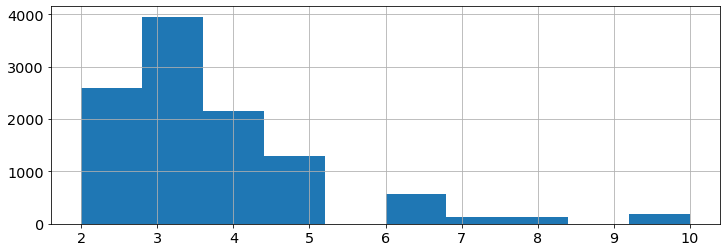

In [25]:
# Histograma 2

df['compras_anteriores'].hist()
#Como suspeitávamos temos uma distribuição anormal para essa variável (inclinação para a direita)

### Explorando variáveis categóricas

In [26]:
# Podemos usar o describe para variáveis categóricas

# top = moda

df[cats].describe()

,corredor_armazem,modo_envio,prioridade_produto,genero
count,11000,11000,11000,11000
unique,5,3,3,2
top,F,Navio,baixa,F
freq,3666,7463,5298,5546


In [27]:
# Agora podemos listar o total para cada categoria:

for col in df[cats]:
    print(f'Total de categoria por variável da coluna {col}:')
    print(df[col].value_counts())
    print()

Total de categoria por variável da coluna corredor_armazem:
F    3666
D    1834
C    1834
A    1833
B    1833
Name: corredor_armazem, dtype: int64

Total de categoria por variável da coluna modo_envio:
Navio       7463
Aviao       1777
Caminhao    1760
Name: modo_envio, dtype: int64

Total de categoria por variável da coluna prioridade_produto:
baixa    5298
media    4754
alta      948
Name: prioridade_produto, dtype: int64

Total de categoria por variável da coluna genero:
F    5546
M    5454
Name: genero, dtype: int64



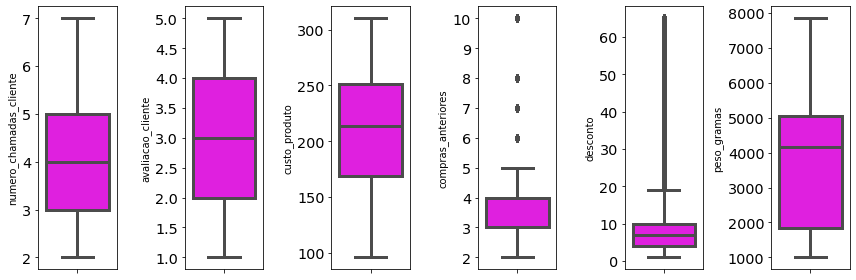

In [29]:
# Análise univariada


features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i + 1)# cria a área de plotagem (1 área de plotagem, comprimento dessa área, número de elementos ná area)
    sns.boxplot(y = df[features[i]], color = 'magenta', orient = 'v')
    plt.tight_layout()

In [30]:
# No gráfico acima observamos que as variáveis compras_anteriores e desconto apresentam outliers. 

# Já as outras não apresentam anomalias, somente em alguns casos uma maior distribuição ao redor da mediana.

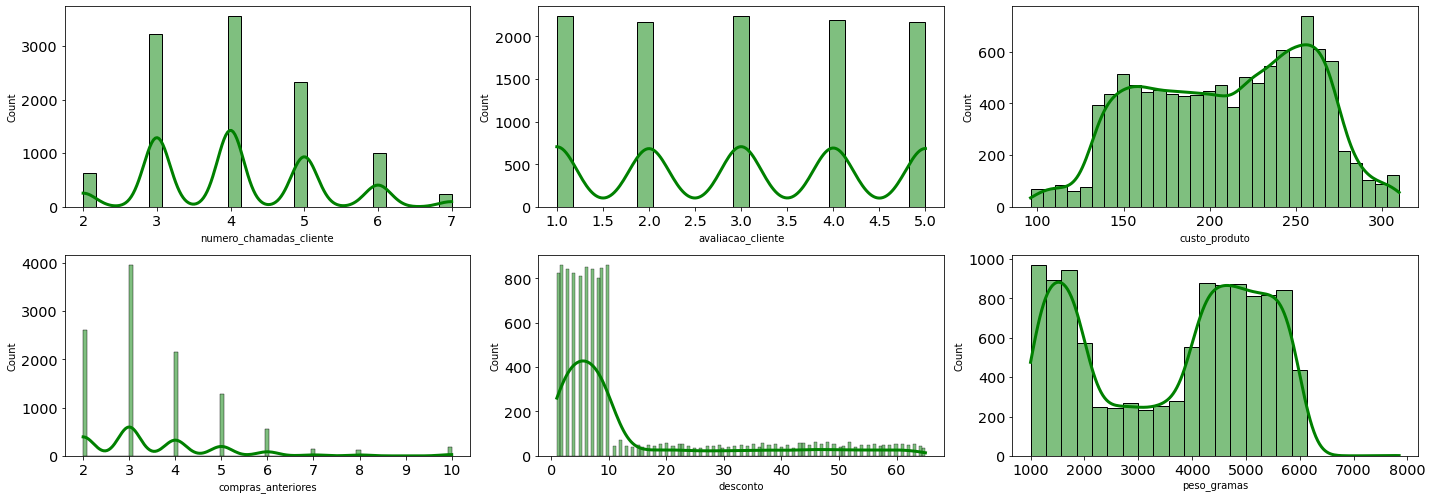

In [39]:
# Gráficos de distribuição (dist plots)

features = nums

plt.figure(figsize=(20,10))

for i in range(0, len(nums)):
    plt.subplot(3, 3, i+1)
    sns.histplot(x = df[features[i]], kde = True, color = 'green')# kde = linha de distribuição
    plt.xlabel(features[i])
    plt.tight_layout()

In [40]:
# As duas primeiras variáveis tem uma distribuição uniforme.

# A terceira tem, de modo aproximado, uma distribuição normal.

#A quarta e quinta tem distribuições assimétricas.

# Por último a sexta não é possível identificar a distruição.

# Portanto das seis distribuições somente uma se aproxima de uma distribuição normal.



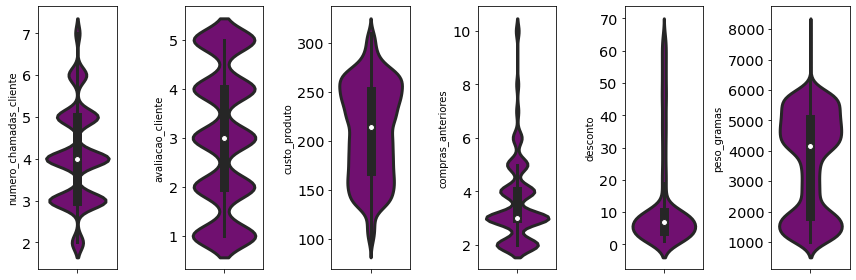

In [41]:
# Violin Plot

# Basicamente une o box plot com o dist plot

for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y = df[nums[i]], color= 'purple', orient='v')
    plt.tight_layout()

In [42]:
# Análise das variávies categóricas.



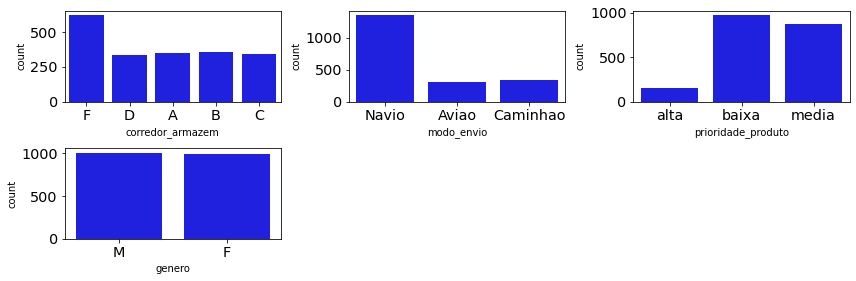

In [43]:
## Count plots

df_amostra = df.sample(2000, random_state=42) #usando apenas uma amostra para facilitar a criação dos gráficos

for i in range(0, len(cats)):
    plt.subplot(2,3,i+1)
    sns.countplot(x = df_amostra[cats[i]], color='blue', orient='v')
    plt.tight_layout()

In [ ]:
# Ao analisar os gráficos acima percebemos que o modo de envio predominante é através de navios. 
# O que faz sentido já que é o meio de envio mais barato.

#Observamos também que a prioridade de envio mais usada é a baixa, o que também faz sentido já que é a mais barata.

<AxesSubplot:xlabel='entregue_no_prazo', ylabel='count'>

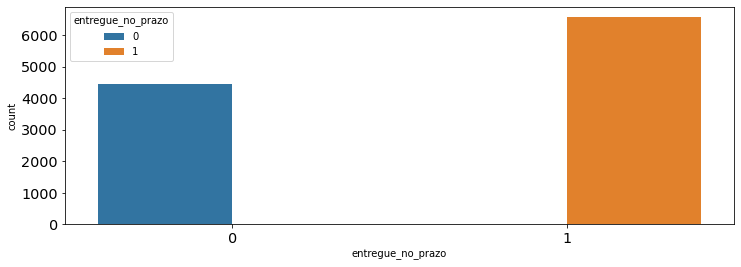

In [46]:
# Count plot da variável target

sns.countplot(data=df, x = df['entregue_no_prazo'], hue='entregue_no_prazo')
#hue =  preenchimento das barras

<AxesSubplot:>

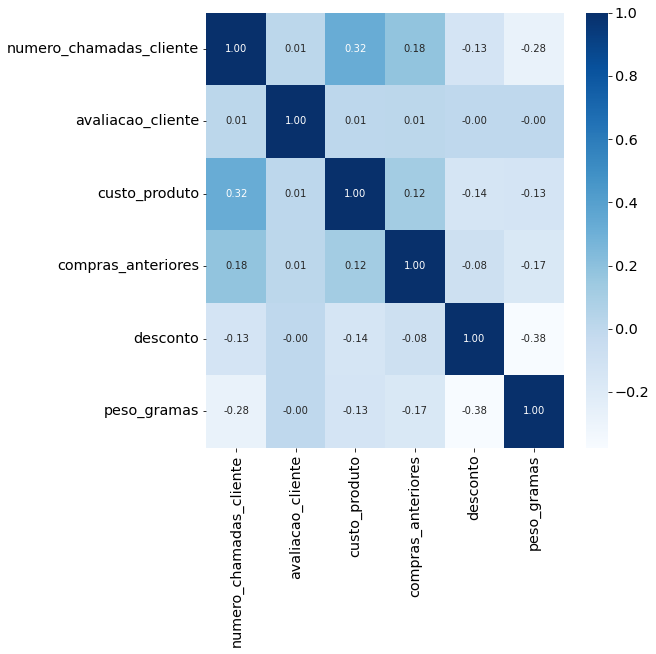

In [48]:
# Análise Bivariada

# Correlação das variáveis numéricas

corr_df = df[nums].corr()

plt.figure(figsize=(8,8))

sns.heatmap(corr_df, cmap='Blues', annot=True, fmt='.2f')

<Figure size 1080x1080 with 0 Axes>

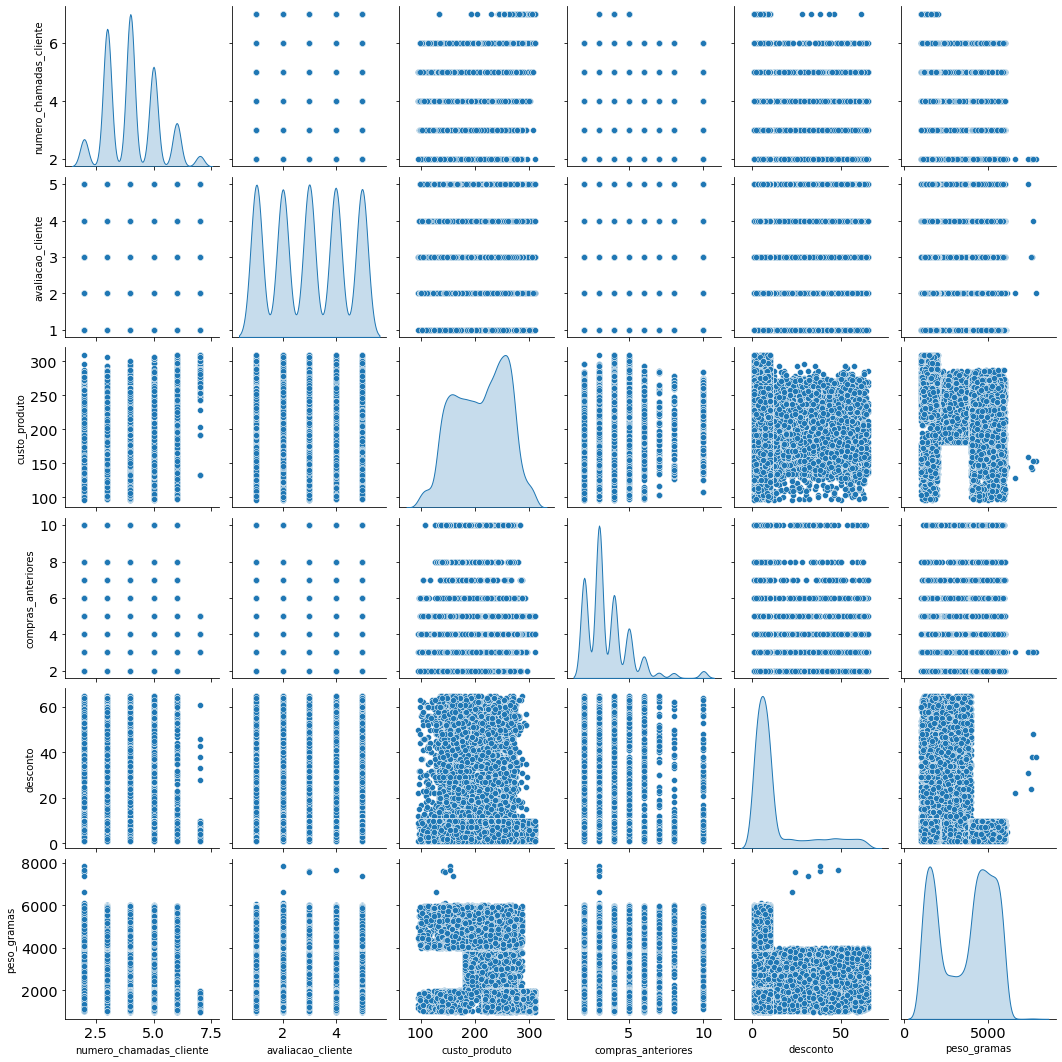

In [49]:
# Pair plot

plt.figure(figsize=(15,15))

sns.pairplot(df[nums], diag_kind= 'kde')

In [50]:
# Observa-se que praticamente não há relação significativa entre as variáiveis, o que já tinha sido mostrado
# através do heatmap.

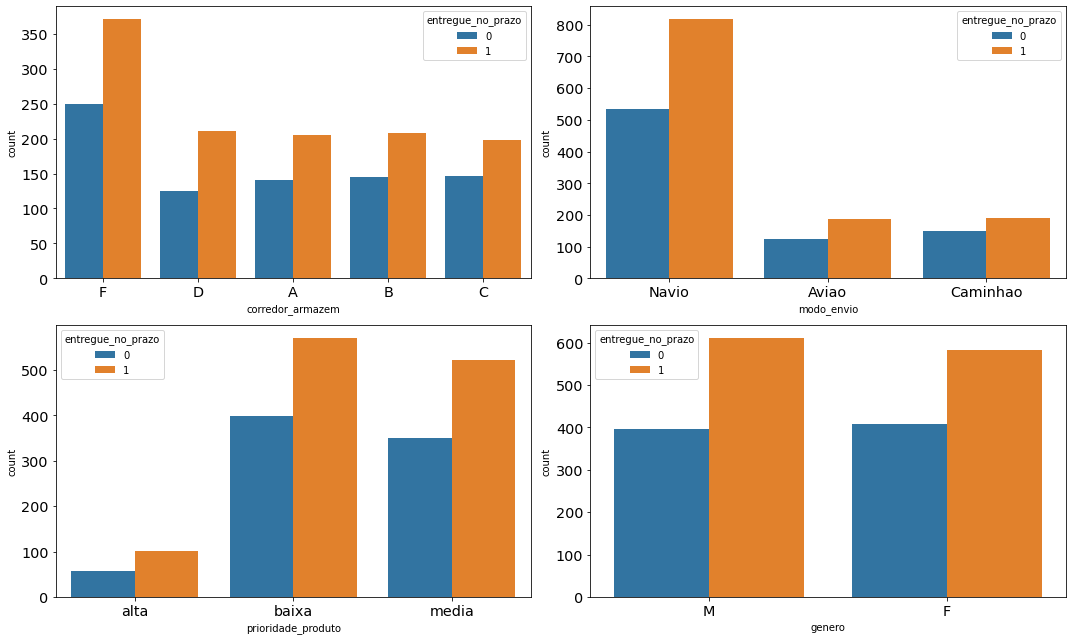

In [52]:
# Análise Bivariada para variáveis categoricas

plt.figure(figsize=(15,9))

features = cats

for i in range(0, len(features)):
    plt.subplot(2,2, i+1)
    sns.countplot(data=df_amostra, x = features[i], hue= 'entregue_no_prazo')
    plt.tight_layout()

In [53]:
# Encomendas enviados por navio tendem a atrasar

# Produtos oriundos do corredor F tendem a atrasar

# Produtos de baixa prioridade tendem a atrasar mais que o outros. Faz sentido dada a volumetria maior de produtos
# de baixa prioridade.

# Mulheres compram menos produtos chegam no prazo.

### **Conclusões da análise inicial**

Algumas das coisas que encontramos neste conjunto de dados são:

* Os dados parecem válidos e não há defeitos maiores/significativos.

* Existem algumas distribuições que são um pouco *assimétricas*, isso deve ser lembrado se usarmos modelos que exijam a suposição de uma distribuição normal.

* Não detectamos problemas de multicolinearidade.

* Alguns *recursos* parecem completamente não correlacionados.

* Dos recursos categóricos, `modo_envio` , `corredor_armazem` e `importancia_produto` parecem úteis para prever a variável target.

## **Parte 2 - Respondendo a algumas perguntas de negócio**

### 1- Os atrasos nas entregas estão igualmente distribuídos pelos modos de envio? Há diferenças discrepantes?

In [ ]:
# É tentador responder essa pergunta usando somente o count plot criado acima, apenas observando o gráfico vemos
# que temos um volume maior de entregas atrasadas no envio de navio.
# Mas temos que levar em conta que o volume maior de envios é por navio, logo não podemos olhar apenas esse valor
# absoluto, mas sim o valor percentual.

In [54]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [57]:
df['modo_envio'].value_counts()

Navio       7463
Aviao       1777
Caminhao    1760
Name: modo_envio, dtype: int64

In [59]:
df_grupo1 = df.groupby(['entregue_no_prazo', 'modo_envio']).agg({'ID': 'nunique'}).reset_index()
df_grupo1
# Usamos a coluna ID para pegar somente valores únicos (select distinct no SQL).

,entregue_no_prazo,modo_envio,ID
0,0,Aviao,708
1,0,Caminhao,725
2,0,Navio,3004
3,1,Aviao,1069
4,1,Caminhao,1035
5,1,Navio,4459


In [60]:
df_grupo2 = df.groupby('entregue_no_prazo').agg({'ID':'nunique'}).reset_index()
df_grupo2

,entregue_no_prazo,ID
0,0,4437
1,1,6563


In [61]:
df_grupo3 = df_grupo1.merge(df_grupo2, on= 'entregue_no_prazo')
df_grupo3

,entregue_no_prazo,modo_envio,ID_x,ID_y
0,0,Aviao,708,4437
1,0,Caminhao,725,4437
2,0,Navio,3004,4437
3,1,Aviao,1069,6563
4,1,Caminhao,1035,6563
5,1,Navio,4459,6563


In [62]:
df_grupo4 = df.groupby('modo_envio').agg({'ID':'nunique'}).reset_index()
df_grupo4

,modo_envio,ID
0,Aviao,1777
1,Caminhao,1760
2,Navio,7463


In [63]:
df_grupo5 = df_grupo1.merge(df_grupo4, on='modo_envio')
df_grupo5

,entregue_no_prazo,modo_envio,ID_x,ID_y
0,0,Aviao,708,1777
1,1,Aviao,1069,1777
2,0,Caminhao,725,1760
3,1,Caminhao,1035,1760
4,0,Navio,3004,7463
5,1,Navio,4459,7463


In [65]:
#Fazendo os percentuais:

df_grupo5['Percentual(%)'] = round((df_grupo5['ID_x']/df_grupo5['ID_y'])*100, 2)
df_grupo5

,entregue_no_prazo,modo_envio,ID_x,ID_y,Percentual(%)
0,0,Aviao,708,1777,39.84
1,1,Aviao,1069,1777,60.16
2,0,Caminhao,725,1760,41.19
3,1,Caminhao,1035,1760,58.81
4,0,Navio,3004,7463,40.25
5,1,Navio,4459,7463,59.75


In [67]:
# Melhorando os nomes das colunas

df_grupo5.columns = ['Status de Entrega no Prazo', 
                     'Modo de Envio', 
                     'Total Por Categoria', 
                     'Total Geral', 
                     'Percentual(%)']
df_grupo5

,Status de Entrega no Prazo,Modo de Envio,Total Por Categoria,Total Geral,Percentual(%)
0,0,Aviao,708,1777,39.84
1,1,Aviao,1069,1777,60.16
2,0,Caminhao,725,1760,41.19
3,1,Caminhao,1035,1760,58.81
4,0,Navio,3004,7463,40.25
5,1,Navio,4459,7463,59.75


In [68]:
# Ao observar a tabela acima notamos que não existe diferença significativa na forma de envio (basta olhar para 
# a variável percentual) mas podemos apresentar essa conclusão graficamente.

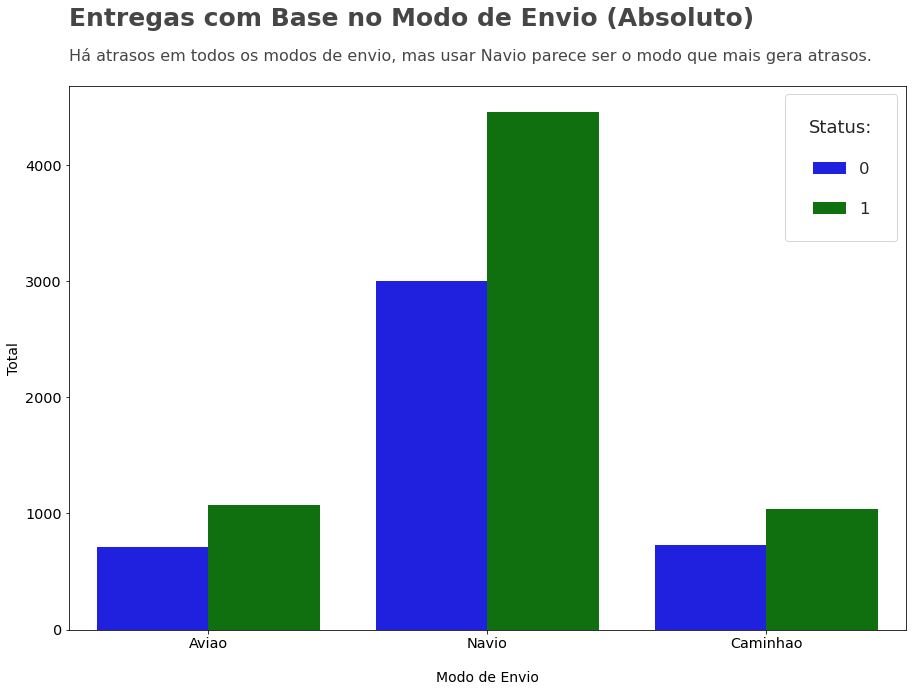

In [69]:
# Gráfico 1: Análise de valores absolutos

plt.figure(figsize=(15,10))

#chart

chart = sns.countplot(data= df,
                     x = 'modo_envio',
                     hue= 'entregue_no_prazo',
                     palette=['blue', 'green'])

#Configurando estilo e labels

sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel('\nModo de Envio', fontsize = 14)
chart.set_ylabel('Total', fontsize = 14)

# Legenda

plt.legend(loc = 'upper right',
          borderpad = 1.5,
          labelspacing = 1.5,
          title = 'Status:')

# Título

chart.text(x = -0.5,
          y = 5200,
          s = 'Entregas com Base no Modo de Envio (Absoluto)',
          fontsize = 25,
          weight = 'bold',
          alpha = 0.85)
            
#Subtítulo

chart.text(x = -0.5, 
           y = 4900,
           s = 'Há atrasos em todos os modos de envio, mas usar Navio parece ser o modo que mais gera atrasos.',
           fontsize = 16, 
           alpha = .85);

In [70]:
df_grupo5.columns

Index(['Status de Entrega no Prazo', 'Modo de Envio', 'Total Por Categoria',
       'Total Geral', 'Percentual(%)'],
      dtype='object')

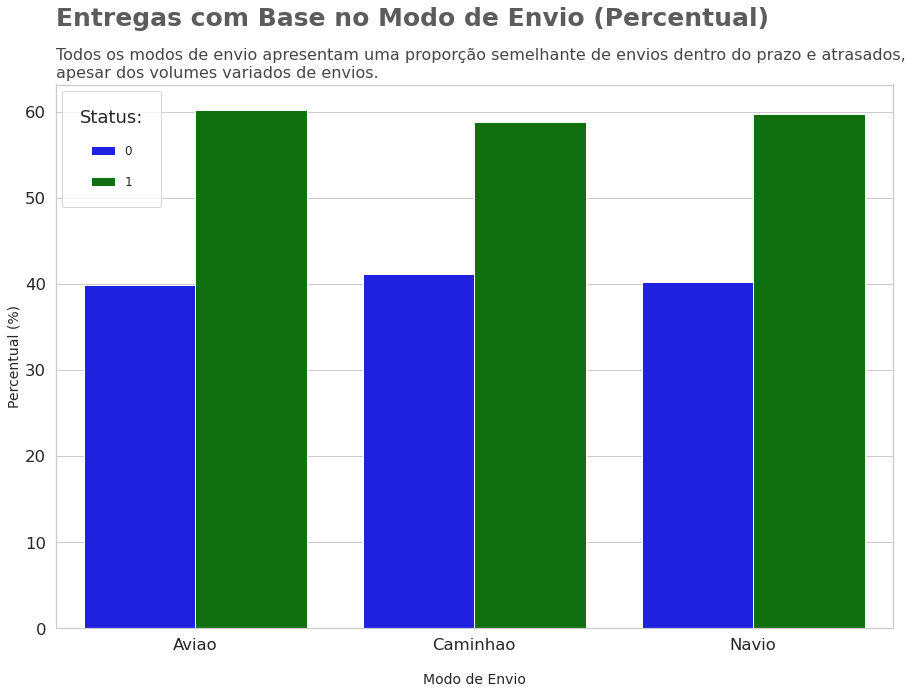

In [71]:
# Gráfico 2: Valores percentuais

plt.figure(figsize=(15,10))

#chart

chart = sns.barplot(data = df_grupo5,
                     x = 'Modo de Envio',
                     y= 'Percentual(%)',
                      hue= 'Status de Entrega no Prazo',
                      palette=['blue', 'green'])

 #Estilo e labels
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\nModo de Envio", fontsize = 14)
chart.set_ylabel("Percentual (%)", fontsize = 14)

# Legenda
plt.legend(loc = 'upper left', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 12, 
           title = 'Status:')

# Título
chart.text(x = -0.5, 
           y = 70, 
           s = "Entregas com Base no Modo de Envio (Percentual)",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)

# Sub-título
chart.text(x = -0.5, 
           y = 64,
           s = 'Todos os modos de envio apresentam uma proporção semelhante de envios dentro do prazo e atrasados, \napesar dos volumes variados de envios.',
           fontsize = 16, 
           alpha = .85);

### 2- Há diferença significativa no atraso das entregas quando o produto tem prioridade baixa ou média?

In [72]:
# Procedimento semelhante do que feito acima

df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [73]:
df_grupo11 = df.groupby(['entregue_no_prazo', 'prioridade_produto']).agg({'ID':'nunique'}).reset_index()
df_grupo11

,entregue_no_prazo,prioridade_produto,ID
0,0,alta,332
1,0,baixa,2158
2,0,media,1947
3,1,alta,616
4,1,baixa,3140
5,1,media,2807


In [74]:
df_grupo12 = df.groupby('entregue_no_prazo').agg({'ID':'nunique'}).reset_index()
df_grupo12

,entregue_no_prazo,ID
0,0,4437
1,1,6563


In [75]:
df_grupo13 = df_grupo11.merge(df_grupo12, on='entregue_no_prazo')
df_grupo13

,entregue_no_prazo,prioridade_produto,ID_x,ID_y
0,0,alta,332,4437
1,0,baixa,2158,4437
2,0,media,1947,4437
3,1,alta,616,6563
4,1,baixa,3140,6563
5,1,media,2807,6563


In [76]:
df_grupo14 = df.groupby('prioridade_produto').agg({'ID':'nunique'}).reset_index()
df_grupo14

,prioridade_produto,ID
0,alta,948
1,baixa,5298
2,media,4754


In [77]:
df_grupo15 = df_grupo11.merge(df_grupo14, on='prioridade_produto')
df_grupo15

,entregue_no_prazo,prioridade_produto,ID_x,ID_y
0,0,alta,332,948
1,1,alta,616,948
2,0,baixa,2158,5298
3,1,baixa,3140,5298
4,0,media,1947,4754
5,1,media,2807,4754


In [78]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [79]:
df_grupo13['Percentual(%)'] = round((df_grupo13['ID_x']/df_grupo13['ID_y'])*100, 2)
df_grupo13

,entregue_no_prazo,prioridade_produto,ID_x,ID_y,Percentual(%)
0,0,alta,332,4437,7.48
1,0,baixa,2158,4437,48.64
2,0,media,1947,4437,43.88
3,1,alta,616,6563,9.39
4,1,baixa,3140,6563,47.84
5,1,media,2807,6563,42.77


In [80]:
df_grupo13.columns = ['Status de Entrega no Prazo', 
                      'Prioridade do Produto', 
                      'Total Por Categoria', 
                      'Total Geral', 
                      'Percentual(%)']
df_grupo13

,Status de Entrega no Prazo,Prioridade do Produto,Total Por Categoria,Total Geral,Percentual(%)
0,0,alta,332,4437,7.48
1,0,baixa,2158,4437,48.64
2,0,media,1947,4437,43.88
3,1,alta,616,6563,9.39
4,1,baixa,3140,6563,47.84
5,1,media,2807,6563,42.77


In [81]:
df_grupo15['Percentual(%)'] = round((df_grupo15['ID_x']/df_grupo15['ID_y']*100), 2)

In [82]:
df_grupo15.columns = ['Status de Entrega no Prazo', 
                      'Prioridade do Produto', 
                      'Total Por Categoria', 
                      'Total Geral', 
                      'Percentual(%)']
df_grupo15

,Status de Entrega no Prazo,Prioridade do Produto,Total Por Categoria,Total Geral,Percentual(%)
0,0,alta,332,948,35.02
1,1,alta,616,948,64.98
2,0,baixa,2158,5298,40.73
3,1,baixa,3140,5298,59.27
4,0,media,1947,4754,40.95
5,1,media,2807,4754,59.05


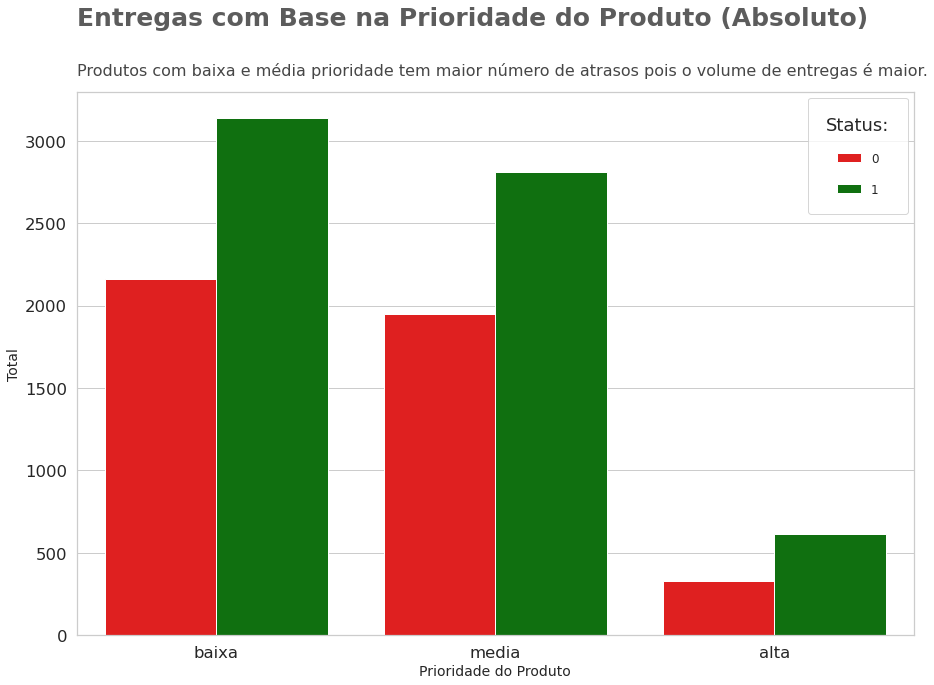

In [84]:
 #Gráfico 1 - Análise em Valores Absolutos
plt.figure(figsize = (15,10))
chart = sns.countplot(data = df, 
                      x = 'prioridade_produto', 
                      hue = 'entregue_no_prazo',
                      palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("Prioridade do Produto", fontsize = 14)
chart.set_ylabel("Total", fontsize = 14)
plt.legend(loc = 'upper right', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 12, 
           title = 'Status:')
chart.text(x = -0.5, 
           y = 3700, 
           s = "Entregas com Base na Prioridade do Produto (Absoluto)",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 3400,
           s = 'Produtos com baixa e média prioridade tem maior número de atrasos pois o volume de entregas é maior.',
           fontsize = 16, 
           alpha = .85);

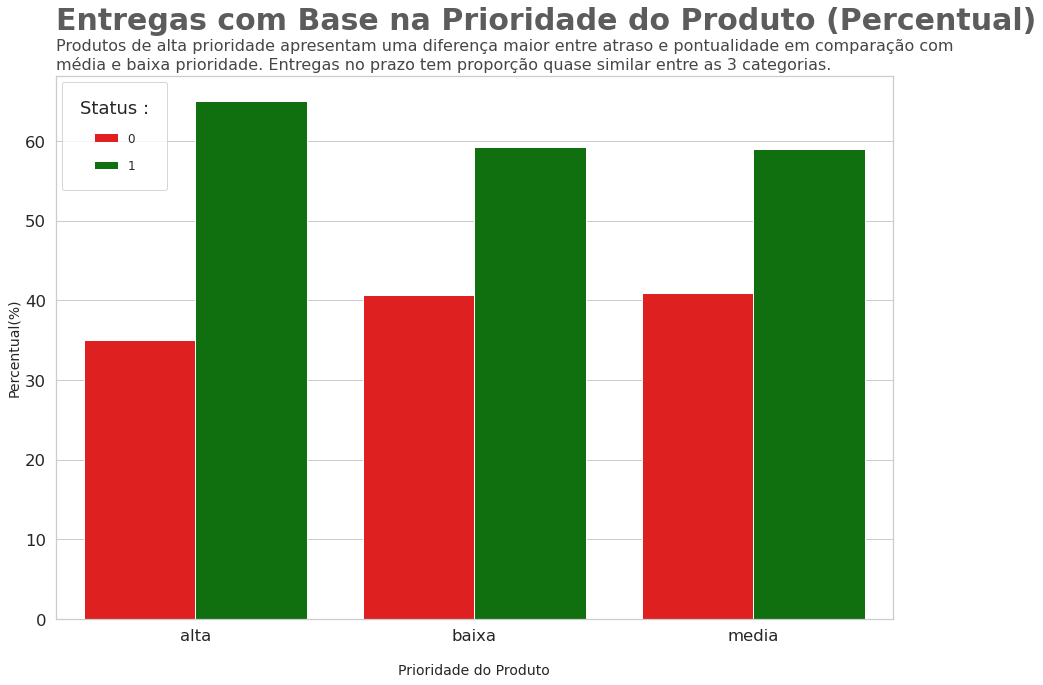

In [86]:
# Gráfico 2 - Análise em Valores Percentuais
plt.figure(figsize = (15,10))
chart = sns.barplot(x = 'Prioridade do Produto', 
                    y = 'Percentual(%)', 
                    data = df_grupo15, 
                    hue = 'Status de Entrega no Prazo',
                    palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\nPrioridade do Produto", fontsize = 14)
chart.set_ylabel("Percentual(%)", fontsize = 14)
plt.legend(loc = 'upper left', 
           borderpad = 1.5, 
           labelspacing = 1.2, 
           fontsize = 12, 
           title = 'Status :')
chart.text(x = -0.5, 
           y = 74, 
           s = "Entregas com Base na Prioridade do Produto (Percentual)",
           fontsize = 30, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 69,
           s = 'Produtos de alta prioridade apresentam uma diferença maior entre atraso e pontualidade em comparação com \nmédia e baixa prioridade. Entregas no prazo tem proporção quase similar entre as 3 categorias.',
           fontsize = 16, 
           alpha = .85);

In [87]:
# Observando o gráfico acima notamos que não há discrepância significativa para sem atraso na entrega nas 3 classes
# de prioridade.

# Já para a classe entrega com atraso observamos que ela se mantém igual para as classes de prioridade baixa e média
# e que é um pouco mais baixa para a classe de prioridade alta.

### 3- Quais corredores armazenam produtos com maior proporção de entregas com atraso?

In [90]:
# O procedimento a seguir é muito similiar aos procedimentos utilizados para as questões 1 e 2.
# A diferença é usaremos a variável 'corredor_armazem'

df_grupo21 = df.groupby(['entregue_no_prazo','corredor_armazem']).agg({'ID':'nunique'}).reset_index()
df_grupo21

,entregue_no_prazo,corredor_armazem,ID
0,0,A,758
1,0,B,729
2,0,C,740
3,0,D,738
4,0,F,1472
5,1,A,1075
6,1,B,1104
7,1,C,1094
8,1,D,1096
9,1,F,2194


In [91]:
df_grupo22 = df.groupby('entregue_no_prazo').agg({'ID': 'nunique'}).reset_index()
df_grupo22

,entregue_no_prazo,ID
0,0,4437
1,1,6563


In [92]:
df_grupo23 = df_grupo21.merge(df_grupo22, on= 'entregue_no_prazo')
df_grupo23

,entregue_no_prazo,corredor_armazem,ID_x,ID_y
0,0,A,758,4437
1,0,B,729,4437
2,0,C,740,4437
3,0,D,738,4437
4,0,F,1472,4437
5,1,A,1075,6563
6,1,B,1104,6563
7,1,C,1094,6563
8,1,D,1096,6563
9,1,F,2194,6563


In [93]:
df_grupo23['Percentual(%)'] = round((df_grupo23['ID_x']/df_grupo23['ID_y'])*100,2)
df_grupo23.columns = ['Status de Entrega no Prazo', 
                      'Corredor do Armazem', 
                      'Total Por Categoria', 
                      'Total Geral', 
                      'Percentual(%)']
df_grupo23

,Status de Entrega no Prazo,Corredor do Armazem,Total Por Categoria,Total Geral,Percentual(%)
0,0,A,758,4437,17.08
1,0,B,729,4437,16.43
2,0,C,740,4437,16.68
3,0,D,738,4437,16.63
4,0,F,1472,4437,33.18
5,1,A,1075,6563,16.38
6,1,B,1104,6563,16.82
7,1,C,1094,6563,16.67
8,1,D,1096,6563,16.70
9,1,F,2194,6563,33.43


In [96]:
# Podemos fazer a mesma coisa que fizemos com df_grupo21 e df_grupo22 mas usando a variável 'Corredor do Armazem'
df_grupo24 = df.groupby('corredor_armazem').agg({'ID':'nunique'}).reset_index()
df_grupo24

,corredor_armazem,ID
0,A,1833
1,B,1833
2,C,1834
3,D,1834
4,F,3666


In [97]:
df_grupo25 = df_grupo21.merge(df_grupo24, on='corredor_armazem')
df_grupo25

,entregue_no_prazo,corredor_armazem,ID_x,ID_y
0,0,A,758,1833
1,1,A,1075,1833
2,0,B,729,1833
3,1,B,1104,1833
4,0,C,740,1834
5,1,C,1094,1834
6,0,D,738,1834
7,1,D,1096,1834
8,0,F,1472,3666
9,1,F,2194,3666


In [98]:
df_grupo25['Percentual(%)'] = df_grupo25['ID_x'] / df_grupo25['ID_y'] * 100
df_grupo25.columns = ['Status de Entrega no Prazo', 
                      'Corredor do Armazem', 
                      'Total Por Categoria', 
                      'Total Geral', 
                      'Percentual(%)']
df_grupo25

,Status de Entrega no Prazo,Corredor do Armazem,Total Por Categoria,Total Geral,Percentual(%)
0,0,A,758,1833,41.352973
1,1,A,1075,1833,58.647027
2,0,B,729,1833,39.770867
3,1,B,1104,1833,60.229133
4,0,C,740,1834,40.348964
5,1,C,1094,1834,59.651036
6,0,D,738,1834,40.239913
7,1,D,1096,1834,59.760087
8,0,F,1472,3666,40.152755
9,1,F,2194,3666,59.847245


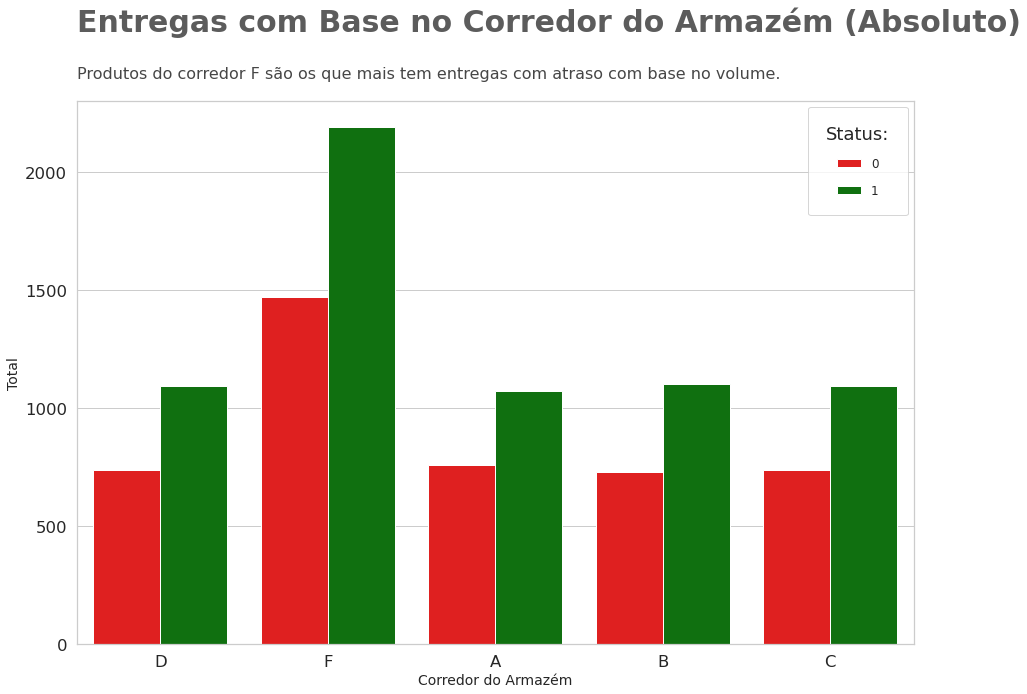

In [101]:
# Gráfico 1 - Análise em Valores Absolutos
plt.figure(figsize = (15,10))
chart = sns.countplot(data = df, 
                      x = 'corredor_armazem', 
                      hue = 'entregue_no_prazo', 
                      palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("Corredor do Armazém", fontsize = 14)
chart.set_ylabel("Total", fontsize = 14)
plt.legend(loc = 'upper right', 
           borderpad = 1.5, 
           labelspacing = 1.2, 
           fontsize = 12, 
           title = 'Status:')
chart.text(x = -0.5, 
           y = 2600, 
           s = "Entregas com Base no Corredor do Armazém (Absoluto)",
           fontsize = 30, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 2400,
           s = 'Produtos do corredor F são os que mais tem entregas com atraso com base no volume.',
           fontsize = 16, 
           alpha = .85);

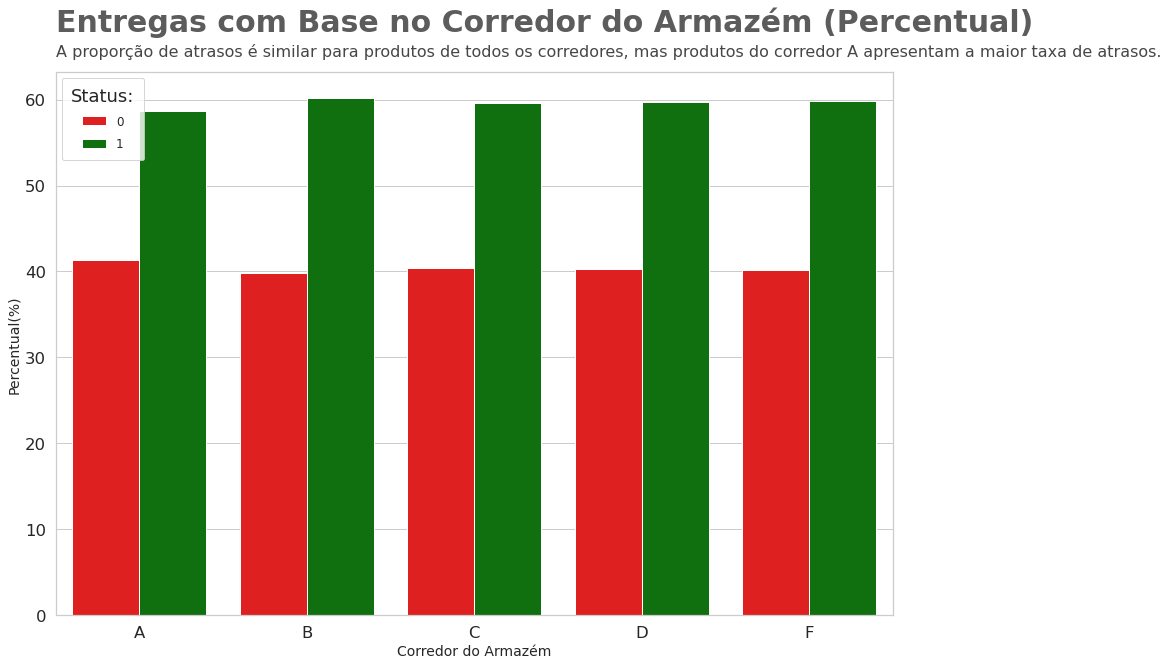

In [102]:
# Gráfico 2 - Análise em Valores Percentuais
plt.figure(figsize = (15,10))
chart = sns.barplot(x = 'Corredor do Armazem', 
                    y = 'Percentual(%)', 
                    data = df_grupo25, 
                    hue = 'Status de Entrega no Prazo',
                    palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("Corredor do Armazém", fontsize = 14)
chart.set_ylabel("Percentual(%)", fontsize = 14)
plt.legend(loc = 'upper left', 
           borderpad = 0.8, 
           labelspacing = 0.8, 
           fontsize = 12, 
           title = 'Status:')
chart.text(x = -0.5, 
           y = 68, 
           s = "Entregas com Base no Corredor do Armazém (Percentual)",
           fontsize = 30, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 65,
           s = 'A proporção de atrasos é similar para produtos de todos os corredores, mas produtos do corredor A apresentam a maior taxa de atrasos.',
           fontsize = 16, 
           alpha = .85);

In [103]:
#Vale notar que o gráfico percentual contradiz o gráfico absuluto!

### 4 - Como a densidade da variável que representa desconto influencia o status de entrega dos produtos?

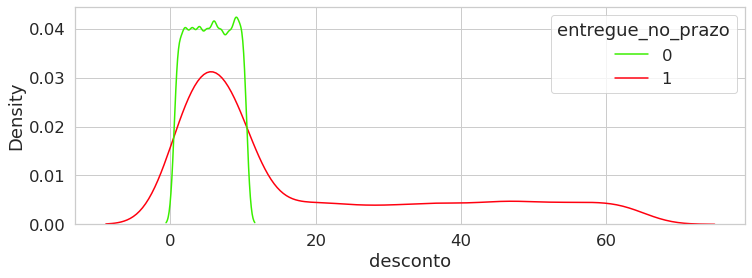

In [104]:
sns.kdeplot(data=df, x = 'desconto', hue= 'entregue_no_prazo');

In [105]:
# Observa-se uma densidade maior, tanto para entregue no prazo quanto atraso na região de 0 a 15%

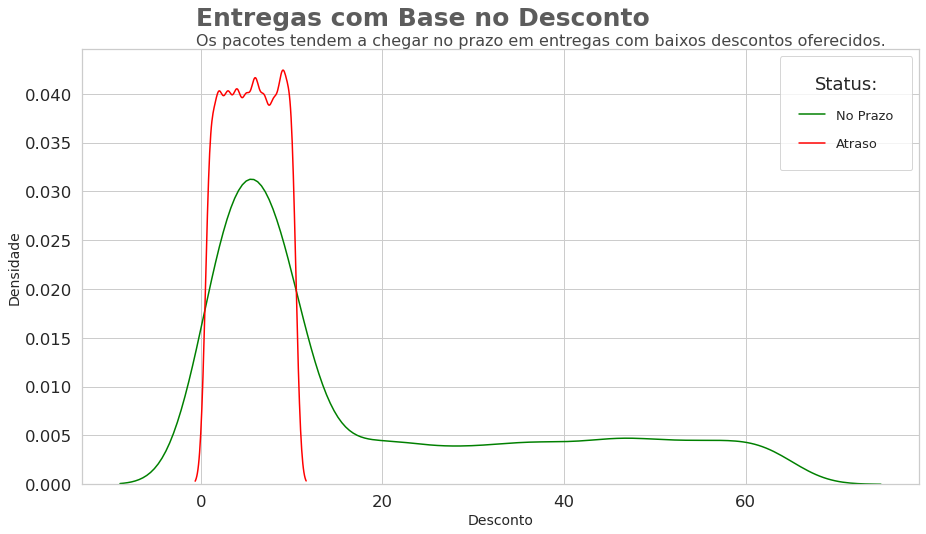

In [106]:
# Resposta com gráfico formatado
plt.figure(figsize = (15,8))
chart = sns.kdeplot(data = df, 
                    x = 'desconto',
                    hue = 'entregue_no_prazo',
                    palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('white')
sns.set_palette('prism')
chart.set_xlabel("Desconto", fontsize = 14)
chart.set_ylabel("Densidade", fontsize = 14)
plt.legend(loc = 'upper right', 
           borderpad = 1.5, 
           labelspacing = 1.2, 
           fontsize = 13, 
           title = 'Status:', 
           labels = ['No Prazo', 'Atraso'])
chart.text(x = -0.5, 
           y = 0.047, 
           s = "Entregas com Base no Desconto",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 0.045,
           s = 'Os pacotes tendem a chegar no prazo em entregas com baixos descontos oferecidos.',
           fontsize = 16, 
           alpha = .85);